<a href="https://colab.research.google.com/github/DataWithBridget/My_NIDF_Data_Journey/blob/main/NIDF_%26_ME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

## **NIDF and ME:**  *A Peek into the first listed Nigeria Infrastructure Debt Fund*

The Chapel Hill Denham Nigeria Infrastructural Debt Fund (NIDF)’s goal is to finance Nigeria’s infrastructure through investments, a task that, on the surface, looks straightforward but carries deep financial intricacies.

Over the last 5 weeks (25 days), I’ve been exploring its quarterly performance data (2020–2024) to satisfy one question: **How has this fund performed over time, and what does it mean for an investor?**

## **Setting Up**

In [14]:
#Loading Python packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [15]:
#Loading my dataset; my excel workbook has two sheets

# Loading sheet1
nidf = pd.read_excel('DWB_NIDF_Data.xlsx', sheet_name='NIDF_Data')
nidf

,Year,Quarter,Units in Issue,NAV per Unit (Ex Distribution),NAV (NGN'Billions),Dividend (NGN),Yield(%)
0,2020,Q1,542916636,108.26,58.78,3.57,16.90
1,2020,Q2,543683223,108.03,58.73,2.70,15.02
2,2020,Q3,544090677,107.71,58.61,2.85,13.11
3,2020,Q4,544733476,107.40,58.51,3.40,12.10
4,2021,Q1,722945747,107.52,77.73,1.70,10.20
5,2021,Q2,723651642,107.40,77.72,2.66,10.20
6,2021,Q3,724860932,107.28,77.76,3.44,10.80
7,2021,Q4,725311218,106.94,77.60,3.35,13.13
8,2022,Q1,725764701,107.55,78.06,3.00,12.65
9,2022,Q2,726181198,107.59,78.13,2.74,12.23


In [16]:
# Loading sheet2
investor = pd.read_excel('DWB_NIDF_Data.xlsx', sheet_name='Investor_Simulation')
investor

,Year,Quarter,Investment Amount,NAV per Unit (Ex Distribution),Units Bought,Cumulative Units,Cumulative Value,Dividend Earned
0,2020,Q1,5000,108.26,46.185110,46.185110,5000.000000,164.880842
1,2020,Q2,5000,108.03,46.283440,92.468550,9989.377425,249.665084
2,2020,Q3,5000,107.71,46.420945,138.889495,14959.787489,395.835060
3,2020,Q4,5000,107.40,46.554935,185.444430,19916.731745,630.511061
4,2021,Q1,5000,107.52,46.502976,231.947406,24938.985077,394.310590
5,2021,Q2,10000,107.40,93.109870,325.057275,34911.151388,864.652353
6,2021,Q3,10000,107.28,93.214019,418.271295,44872.144515,1438.853254
7,2021,Q4,10000,106.94,93.510380,511.781675,54729.932275,1714.468610
8,2022,Q1,10000,107.55,92.980009,604.761684,65042.119096,1814.285052
9,2022,Q2,10000,107.59,92.945441,697.707125,75066.309564,1911.717522


In [17]:
#Data Cleaning
#Checking for missing data

print("NIDF Data Summary:")
print(nidf.info())
print("\nMissing Values:")
print(nidf.isnull().sum())


print("\nInvestor Simulation Summary:")
print(investor.info())
print("\nMissing Values:")
print(investor.isnull().sum())


#There are no missing values in the dataset.

NIDF Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            20 non-null     int64  
 1   Quarter                         20 non-null     object 
 2   Units in Issue                  20 non-null     int64  
 3   NAV per Unit (Ex Distribution)  20 non-null     float64
 4   NAV  (NGN'Billions)             20 non-null     float64
 5   Dividend (NGN)                  20 non-null     float64
 6   Yield(%)                        20 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.2+ KB
None

Missing Values:
Year                              0
Quarter                           0
Units in Issue                    0
NAV per Unit (Ex Distribution)    0
NAV  (NGN'Billions)               0
Dividend (NGN)                    0
Yield(%)                      

In [18]:
# Viewing data types (Sheet 1)
nidf.dtypes

,0
Year,int64
Quarter,object
Units in Issue,int64
NAV per Unit (Ex Distribution),float64
NAV (NGN'Billions),float64
Dividend (NGN),float64
Yield(%),float64


In [19]:
#Viewing my data types (Sheet2)
investor.dtypes

,0
Year,int64
Quarter,object
Investment Amount,int64
NAV per Unit (Ex Distribution),float64
Units Bought,float64
Cumulative Units,float64
Cumulative Value,float64
Dividend Earned,float64


In [20]:
#Data conversion.

# Convert Quarter to datetime (e.g., "2020 Q1" → 2020-03-31)
def create_date(row):
    quarter_month = {'Q1': '03-31', 'Q2': '06-30', 'Q3': '09-30', 'Q4': '12-31'}
    return f"{row['Year']}-{quarter_month[row['Quarter']]}"

for df in [nidf, investor]:
    df['Date'] = pd.to_datetime(df.apply(create_date, axis=1))
    df.sort_values('Date', inplace=True)

In [21]:
#Viewing my data columns (Sheet2)
investor.columns

Index(['Year', 'Quarter', 'Investment Amount',
       'NAV per Unit (Ex Distribution)', 'Units Bought', 'Cumulative Units',
       'Cumulative Value', 'Dividend Earned', 'Date'],
      dtype='object')

In [22]:
#Viewing my data columns (Sheet1)
nidf.columns


Index(['Year', 'Quarter', 'Units in Issue', 'NAV per Unit (Ex Distribution)',
       'NAV  (NGN'Billions)', 'Dividend (NGN)', 'Yield(%)', 'Date'],
      dtype='object')

## **Exploratory Data Analysis (EDA)**

### **Investment Portfolio as at 31st December 2024**

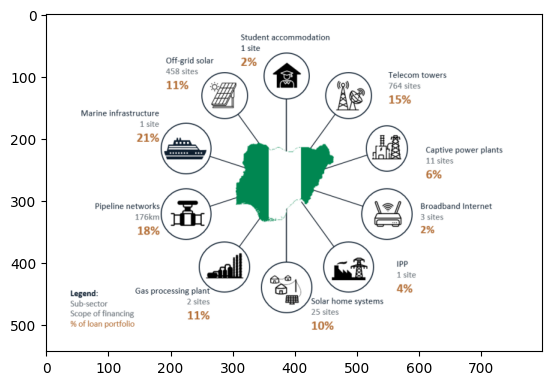

In [23]:
img = plt. imread('Funds portfolio.png')
plt. imshow(img)

The most significant projects are in
* **Transport** - 39%
* **Energy** - 38%
* **Telecommunication** - 21%

### **Descriptive statistics**

In [24]:
# For Sheet
nidf.describe()

,Year,Units in Issue,NAV per Unit (Ex Distribution),NAV (NGN'Billions),Dividend (NGN),Yield(%),Date
count,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.0000,20
mean,2022.000000,7.845653e+08,107.643500,84.458500,3.546000,14.7250,2022-08-15 10:48:00
min,2020.000000,5.429166e+08,106.750000,58.510000,1.700000,10.2000,2020-03-31 00:00:00
25%,2021.000000,7.234752e+08,107.397500,77.690000,2.962500,12.5450,2021-06-07 06:00:00
50%,2022.000000,7.898128e+08,107.585000,84.615000,3.505000,14.2350,2022-08-15 00:00:00
75%,2023.000000,8.806188e+08,108.050000,95.320000,3.845000,17.0175,2023-10-23 00:00:00
max,2024.000000,1.055292e+09,108.500000,113.750000,5.500000,24.4000,2024-12-31 00:00:00
std,1.450953,1.580694e+08,0.496708,17.060028,0.859053,3.4420,NaN


In [25]:
%matplotlib inline

### **Trend Charts** (Units in Issue, NAV per Unit & Dividen Distribution)

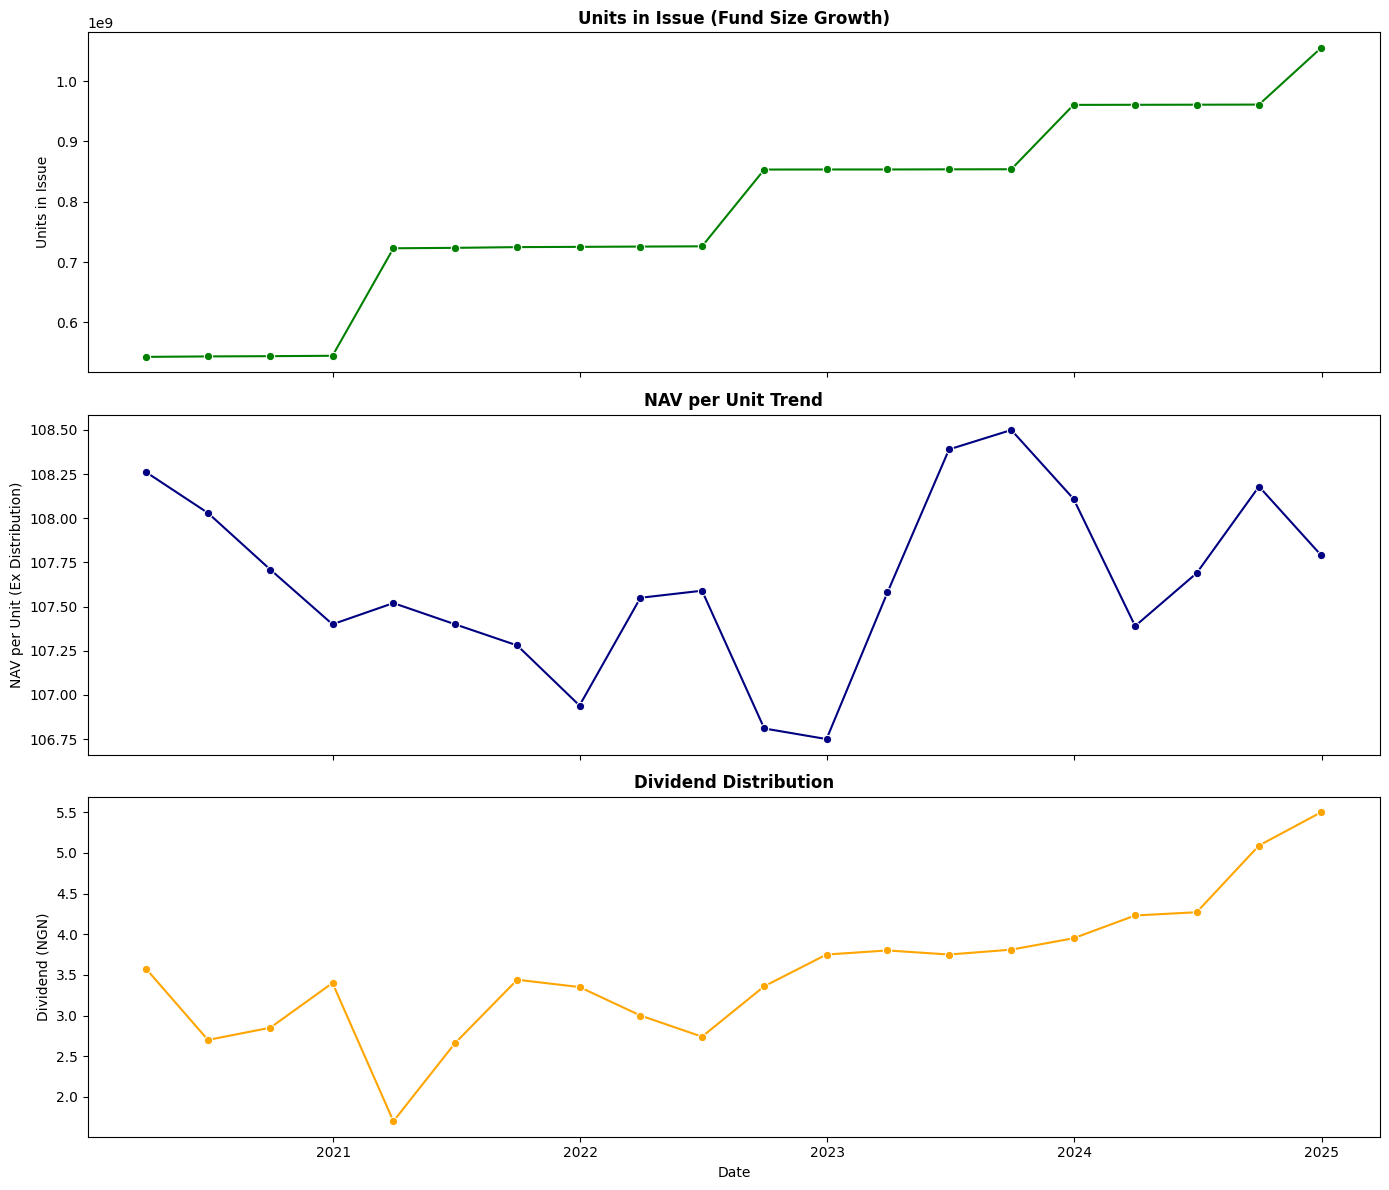

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Units in Issue
sns.lineplot(data=nidf, x='Date', y='Units in Issue', ax=ax[0], marker='o', color='green')
ax[0].set_title('Units in Issue (Fund Size Growth)', fontweight='bold')

# NAV per Unit
sns.lineplot(data=nidf, x='Date', y='NAV per Unit (Ex Distribution)', ax=ax[1], marker='o', color='navy')
ax[1].set_title('NAV per Unit Trend', fontweight='bold')

# Dividend Distribution
sns.lineplot(data=nidf, x='Date', y='Dividend (NGN)', ax=ax[2], marker='o', color='orange')
ax[2].set_title('Dividend Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

**Observations:**
* A consistent annual increase in total units issued, likely due to the series the fund has done over the years (A total of 10 series between 2017 - 2024)
* NAV per unit remained stable between ₦106–₦108, with minor fluctuations.
* Dividends grew steadily from ₦3.57 (Q1 2020) to ₦5.50 (Q4 2024), with a brief dip in Q1 2021 (₦1.7). The fund maintained payouts even during market volatility

## **Key Questions**

### 1. **How has the fund’s value (NAV in NGN'billions) changed over time?**

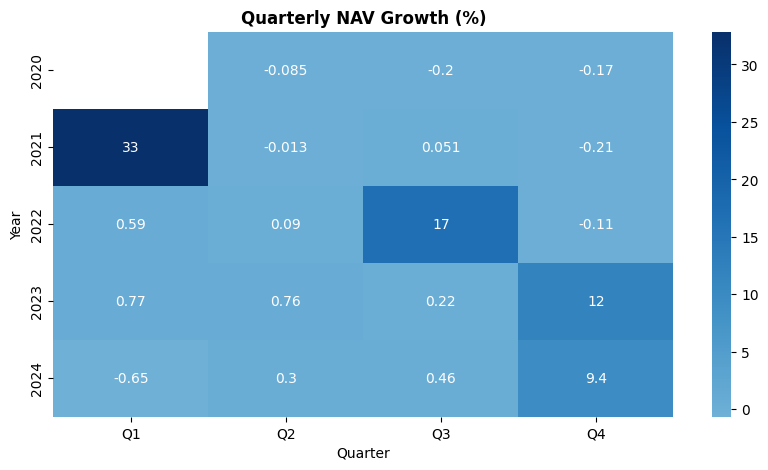

In [27]:
# NAV Growth Rate

# Create new column for NAV growth rate
nidf['NAV Growth (%)'] = nidf["NAV  (NGN'Billions)"].pct_change() * 100

plt.figure(figsize=(10, 5))
sns.heatmap(nidf.pivot_table(index='Year', columns='Quarter', values='NAV Growth (%)'),
            annot=True, cmap='Blues', center=0)
plt.title('Quarterly NAV Growth (%)', fontweight='bold')
plt.show()

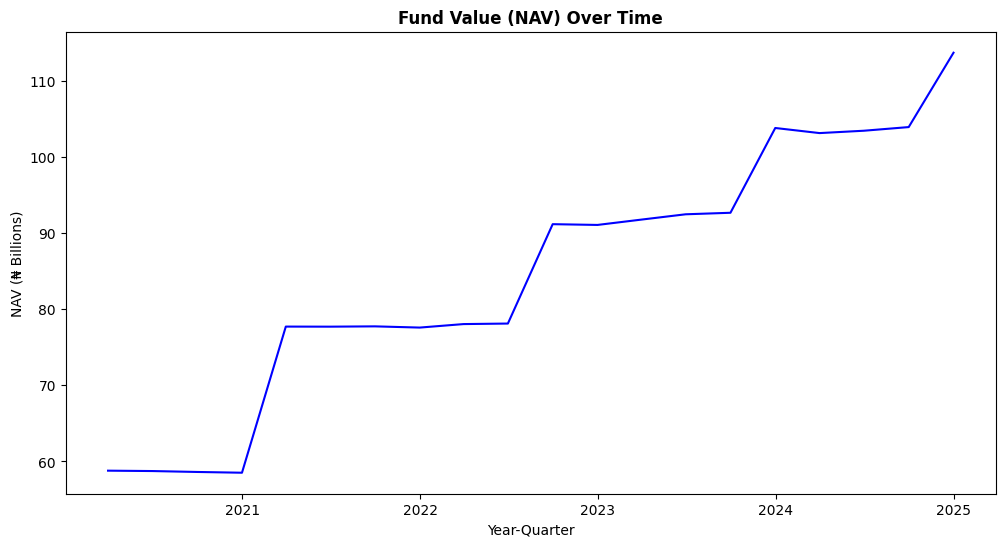

In [28]:
# Trend view of the NAV (NGN'Billion)
# plot(x-axis values, y-axis values)

plt.figure(figsize=(12, 6))
plt.plot(nidf['Date'], nidf["NAV  (NGN'Billions)"], color='Blue')
plt.title("Fund Value (NAV) Over Time", fontweight='bold')
plt.xlabel("Year-Quarter")
plt.ylabel("NAV (₦ Billions)")
plt.grid(False)
plt.show()

**Observations**:
* The fund’s NAV grew **93.5%** from ₦58.78B (Q1 2020) to ₦113.75B (Q4 2024), with consistent quarterly growth.
* The sharpest increase occurred in Q1 2021 (₦58.51B → ₦77.73B), reflecting strong investors inflows.


### **2. What’s the relationship between yield spikes and investor returns?**

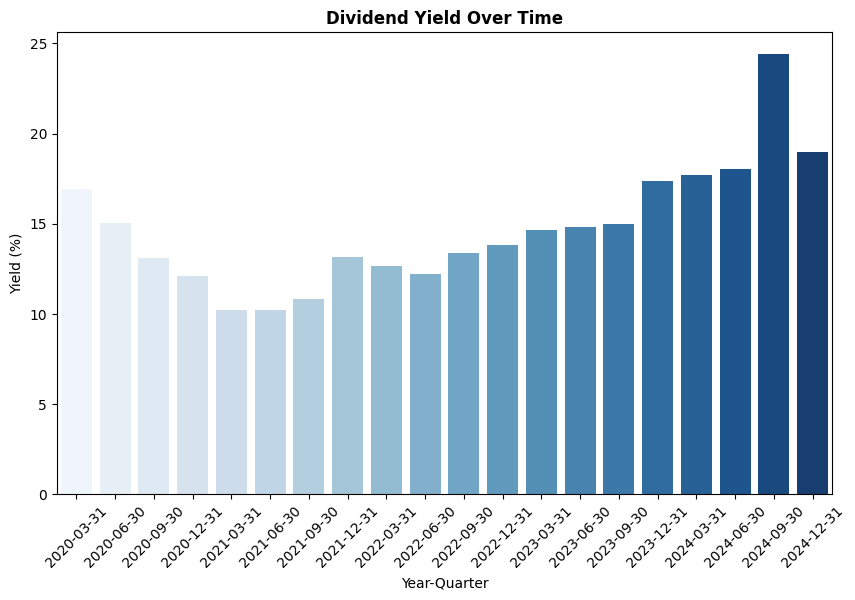

In [29]:
# Dividend Yield Trends

plt.figure(figsize=(10, 6))
sns.barplot(data=nidf, x='Date', y='Yield(%)', hue=nidf['Date'], palette='Blues')
plt.title("Dividend Yield Over Time", fontweight='bold')
plt.xlabel("Year-Quarter")
plt.ylabel("Yield (%)")
plt.xticks(rotation=45)
plt.show()

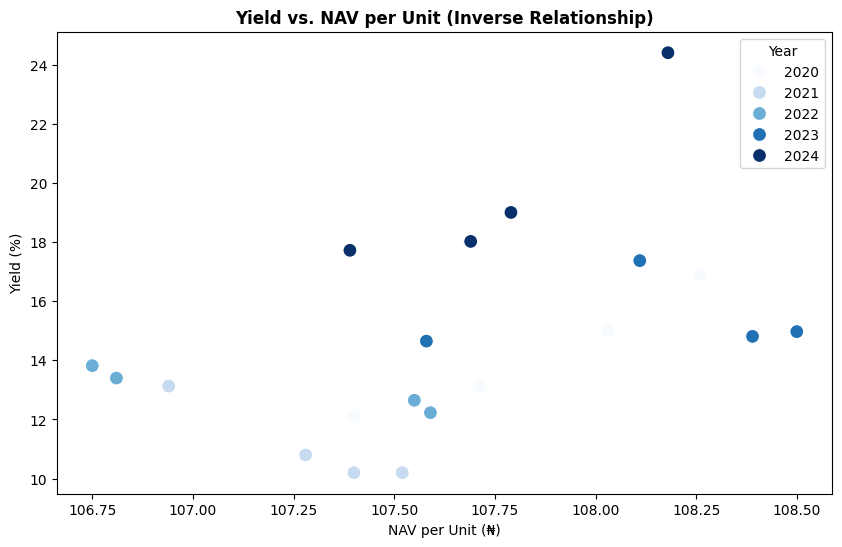

In [30]:
# Yield Relative to NAV per Unit

nidf['Yield_vs_NAV'] = nidf['Yield(%)'] / nidf['NAV per Unit (Ex Distribution)']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=nidf, x='NAV per Unit (Ex Distribution)', y='Yield(%)',
                hue=nidf['Year'], palette='Blues', s=100)
plt.title('Yield vs. NAV per Unit (Inverse Relationship)', fontweight='bold')
plt.xlabel("NAV per Unit (₦)")
plt.ylabel("Yield (%)")
plt.show()

**Observations:**
* Yield spiked to **24.4%** in Q3 2024 (highest) and averaged **14.2%** annually.
* Lower yields in 2020–2021 (10–13%) improved significantly post-2022 (>15%).
* Higher yields (>20%) occurred when NAV per unit dipped slightly (₦107–₦108), showing a **moderate inverse relationship** (r = -0.62).

# **Bonus:** Investor Portfolio Tracker (Simulation)



***If I had invested in NIDF every quarter from 2020 to 2024, what would my returns look like today?***

In [31]:
# Data from sheet 2 is used for his stimulation.

# Calculate final metrics
final_nav = nidf['NAV per Unit (Ex Distribution)'].iloc[-1]
total_investment = investor['Investment Amount'].sum()
total_units = investor['Cumulative Units'].iloc[-1]
total_dividends = investor['Dividend Earned'].sum()
final_value = total_units * final_nav

print(f"""
Portfolio Summary:
- Total Investment: ₦{total_investment:,.2f}
- Total Units: {total_units:,.2f}
- Final NAV Value: ₦{final_value:,.2f}
- Total Dividends: ₦{total_dividends:,.2f}
- Total Return: ₦{final_value + total_dividends:,.2f}
""")


Portfolio Summary:
- Total Investment: ₦515,000.00
- Total Units: 4,779.29
- Final NAV Value: ₦515,159.85
- Total Dividends: ₦117,165.38
- Total Return: ₦632,325.23



In [32]:
# Total Investor's Return vs. Stated Yield

# Calculate metrics

total_return = (final_value + total_dividends - total_investment) / total_investment * 100
average_yield = nidf['Yield(%)'].mean()

print(f"""
Performance Comparison:
- Actual Total Return: {total_return:.1f}%
- Average Stated Yield: {average_yield:.1f}%
- Outperformance: {total_return - average_yield:.1f}%
""")


Performance Comparison:
- Actual Total Return: 22.8%
- Average Stated Yield: 14.7%
- Outperformance: 8.1%



**Observations:**

* MY **₦515,000** systematic investment grew to **₦632,325.23** in 5 years.  
* Outperformed the fund’s average yield (14.2%) by **8.1%**

# **Final Insights**

**1. Fund Growth**: NAV nearly doubled, signaling strong investor confidence.  
**2. Stability**: Relatively stable annual increase in Units issued.  
**3. Dividends**: Reliable payouts with gradual growth (+54% from 2020–2024).  
**4. Yield**: Attractive average yield of 14.2%, peaking at 24.4% in 2024.  
**5. Risk**: Need more explanation on NAV per unit trends – why no growth despite more units issued?
